# **RUMOR PROPAGATION ON SOCIAL NETWORKS BASED ON NETWORK HOMOPHILY**

The work is based on finding homophily in social networks, to observe the behavior of spreading rumors within each of them. The Notebook is divided on three approaches:

**1-** Fake and True News Classification

**2-** Network Homophily

**3-** SIR Model (Susceptible, Recovered, Recovered)

## **DATASET**
For the development of the project, two data sets were used, which were collected for the study of “Detecting Fake News online Using N-Gram analysis and Machine Learning techniques” at the School of Computer Science at the University from Victoria in Canada. In it, information was collected through different news sources where the title of the news, the information it contains, the subject, and the date on which it was published are placed. It is structured in comma separated values ​​(CSV), one contains news with supposedly False or Fake news information, which for our study we will consider rumors and the other file of the same format that contains true information that we will consider as No rumor. Both files are structured in English.



## **A) FAKE AND TRUE NEWS CLASSIFICATION**`

---


In [1]:
#Accesing to my Google Drive Account to take the Dataset
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
#importing Libarries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import networkx as nx
from wordcloud import WordCloud


## **FAKE NEWS**

In [3]:
#Fake News Dataset
ATT_FILE= "/gdrive/My Drive/TFM/Fake.csv" 

In [4]:
fake = pd.read_csv(ATT_FILE,sep=',')
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#Counting by Subjects 
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


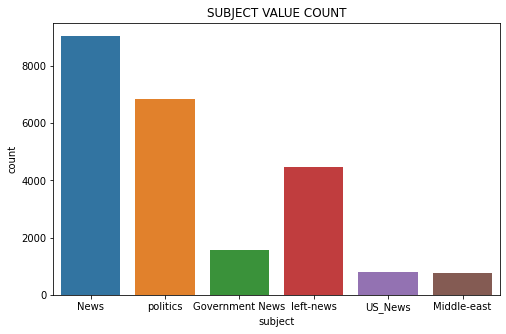

In [6]:
#SUBJECT VALUE COUNTPLOT
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.title('SUBJECT VALUE COUNT')
plt.show()

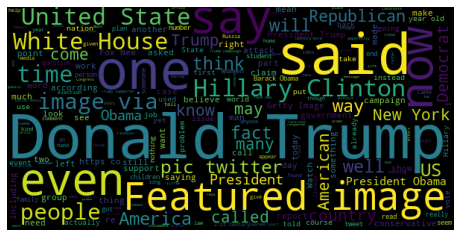

In [7]:
#WordCloudg
import matplotlib.pylab as plt
allwords = ' '.join([fk for fk in fake['text']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **REAL NEWS DATASET**

In [8]:
#REAL NEWS DATASET READING FROM GOOGLE DRIVE
att =  "/gdrive/My Drive/TFM/True.csv"

In [9]:
real = pd.read_csv(att, sep=',')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
#COUNTING THE NUMBER OF SUBECTS PER NEWS
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Text(0.5, 1.0, 'Subject Value Count')

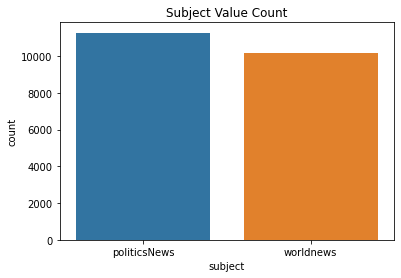

In [11]:
#PLOT
sns.countplot('subject',data=real)
plt.title('Subject Value Count')

In [12]:

#First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [13]:
#Thus we have list of indices where publisher is not mentioned
real.iloc[unknown_publishers].text
#tRYE

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [14]:
#Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [15]:
#Replace existing text column with new text
#add seperate column for publication info
real["publisher"] = publisher
real["text"] = tmp_text

In [16]:
#OBSERVERING LAST 5 ROWS, SHOWING THE PUBLISHER OF THE NEWS
real.tail()

,title,text,subject,date,publisher
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017",MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",MOSCOW (Reuters)
21416,Indonesia to buy $1.14 billion worth of Russia...,Indonesia will buy 11 Sukhoi fighter jets wor...,worldnews,"August 22, 2017",JAKARTA (Reuters)


In [17]:
#checking for rows with empty text like row:8970
[index for index,text in enumerate(real.text.values) if str(text).strip() == '']

[8970]

In [18]:
#dropping this record because is empty
real = real.drop(8970, axis=0)

In [19]:
# checking for the same in fake news
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [20]:
#Getting Total Rows
print(f"Total Records:\t{real.shape[0]}")

#Counting by Subjects 
for key,count in real.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


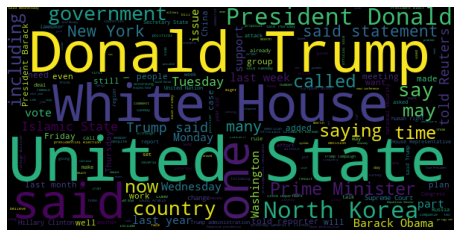

In [21]:
#Word Cloud for real news
import matplotlib.pylab as plt
allwords = ' '.join([rl for rl in real['text']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
# Adding class Information
real["class"] = 1
fake["class"] = 0

In [23]:
# Subject is diffrent for real and fake thus dropping it
# Aldo dropping Date, title and Publication Info of real
real = real.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [24]:
#Combining both into new dataframe
data = real.append(fake, ignore_index=True)

In [25]:
#observing the new column classifying the type of new (1 for real class and 0 for fake class)
data.head()

,text,class
0,The head of a conservative Republican faction...,1
1,Transgender people will be allowed for the fi...,1
2,The special counsel investigation of links be...,1
3,Trump campaign adviser George Papadopoulos to...,1
4,President Donald Trump called on the U.S. Pos...,1


In [26]:
def rumorLabel(value):
  if value == 1:
    return 'No Rumor'
  else:
    return 'Rumor'

In [27]:
#NEW COLUMN WITH THE CLASS LABEL
data['ClassLabel'] = data['class'].apply(rumorLabel)
data

,text,class,ClassLabel
0,The head of a conservative Republican faction...,1,No Rumor
1,Transgender people will be allowed for the fi...,1,No Rumor
2,The special counsel investigation of links be...,1,No Rumor
3,Trump campaign adviser George Papadopoulos to...,1,No Rumor
4,President Donald Trump called on the U.S. Pos...,1,No Rumor
...,...,...,...
44892,21st Century Wire says As 21WIRE reported earl...,0,Rumor
44893,21st Century Wire says It s a familiar theme. ...,0,Rumor
44894,Patrick Henningsen 21st Century WireRemember ...,0,Rumor
44895,21st Century Wire says Al Jazeera America will...,0,Rumor


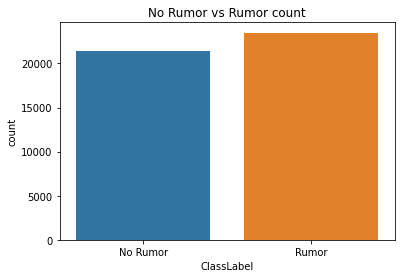

In [28]:
#countplot to compare it
sns.countplot(x='ClassLabel', data=data)
plt.title('No Rumor vs Rumor count')
plt.show()

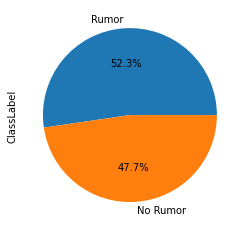

In [29]:
plot_fake_true = data['ClassLabel'].value_counts().plot.pie(subplots=True, figsize=(7, 4),autopct='%1.1f%%')

In [30]:
#dropping the Classlabel Column
data = data.drop(columns=['ClassLabel'])

### **REMOVING STOPWORDS, STEMMING, TOKENIZING**

In [31]:
nltk.download('stopwords')
nltk.download('punkt')
y = data["class"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **STOP-WORDS**

In [32]:
#PRINTING THE REMOVED STOPWORDS JUST TO CHECK
print(stop_words)

{"aren't", 'whom', 'now', 'just', 'weren', 'off', "you'll", 'of', 'himself', "won't", 'can', 'd', "mustn't", "you've", 'by', 'once', 'wasn', 'isn', 'this', 'own', 'which', 'being', "doesn't", "shan't", 'some', "needn't", 'how', 'there', 'your', 'very', 'should', 'further', 'our', 'o', 'didn', 'hasn', 'were', "mightn't", 'until', 'won', 'aren', "weren't", 'its', 'you', 'because', "you'd", 'itself', 'a', 'for', 'themselves', 'from', 'no', 'had', 'on', 'these', 'most', 'mustn', 'herself', "that'll", 'ourselves', 'while', 'out', 'my', 'we', 'through', 'over', "didn't", 'shouldn', 'those', 'ain', 'their', "shouldn't", 'only', 'her', 'have', 'above', "wasn't", 'with', 'and', 'before', 'he', 'where', 'same', "should've", 'the', 'doesn', 'after', 'an', 'it', 'wouldn', 'than', 'hadn', 'yourselves', 'did', 'all', 'here', 'what', 'doing', 'under', "wouldn't", 'yours', 'both', 'couldn', 'yourself', 'be', 'then', 'nor', "hadn't", 'mightn', 'do', 'needn', 'having', 'down', 'ours', 'too', 'll', 'or',

### **WORD2VEC**

In [33]:
import gensim

In [34]:

#Dimension of vectors we are generating
EMBEDDING_DIM = 100

In [35]:
#Creating Word Vectors by Word2Vec Method
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [36]:
from sklearn.manifold import TSNE
#Showing the plot for "trump" related words
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title('Word2Vec Trump related Words')
    plt.show()

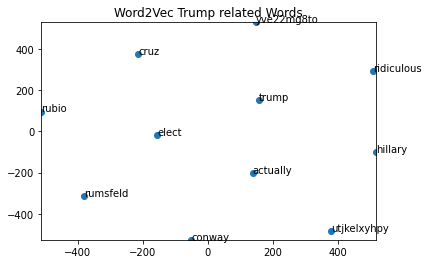

In [37]:
display_closestwords_tsnescatterplot(w2v_model, 'trump')

In [38]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.8963181972503662),
 ('iranian', 0.7116931676864624),
 ('nuclear', 0.6500392556190491),
 ('destabilizing', 0.6425284147262573),
 ('hezbollah', 0.6157373189926147),
 ('iranians', 0.6064267158508301),
 ('riyadh', 0.602139949798584),
 ('sanctions', 0.5870133638381958),
 ('irgc', 0.5853976011276245),
 ('saudis', 0.5824357867240906)]

In [39]:
w2v_model.wv.most_similar("fbi")

[('comey', 0.7117006778717041),
 ('cia', 0.642672598361969),
 ('investigators', 0.617699146270752),
 ('investigation', 0.6128209829330444),
 ('mueller', 0.6018410921096802),
 ('doj', 0.5975477695465088),
 ('probe', 0.5604372024536133),
 ('investigations', 0.5550510883331299),
 ('inquiry', 0.5545238256454468),
 ('whosonfirst', 0.5523741245269775)]

In [40]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer
from keras.preprocessing.text import Tokenizer
#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

Using TensorFlow backend.


In [41]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[318, 208, 16, 6038, 104, 692, 151, 1106, 2838, 44]

In [42]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 21:
        break

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
also -> 8
new -> 9
clinton -> 10
obama -> 11
government -> 12
donald -> 13
house -> 14
states -> 15
republican -> 16
year -> 17
could -> 18
united -> 19
told -> 20
like -> 21


In [43]:

nos = np.array([len(x) for x in X])
len(nos[nos  <10000000])
# Out of 48k news, 42k have less than 2000 words

44897

In [44]:
#Lets keep all news to 500, add padding to news with less than 500 words and truncating long ones
from keras.preprocessing.sequence import pad_sequences
maxlen = 4000


In [45]:

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [46]:
print(len(X))

44897


In [47]:

# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1
vocab_size

121738

In [48]:

# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [49]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)
print(embedding_vectors)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.38012052 -0.57099116  0.39963809 ...  1.59416044 -0.51264119
   0.09048363]
 [-0.35005578 -0.93688607  1.3755213  ... -0.93891788 -1.41525078
  -0.50043082]
 ...
 [ 0.00043875 -0.01586314 -0.00689137 ... -0.01316552  0.03142822
   0.00168776]
 [-0.00220065 -0.01508607  0.00312509 ...  0.02168576  0.02255836
   0.01815489]
 [ 0.017041    0.00365607  0.00436494 ...  0.0106569  -0.00577431
   0.03558934]]


### **NEURAL NETWORK FOR RUMOR CLASSIFICATION**

In [50]:
#Defining Neural Network
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense
import random
random.seed(30)
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [51]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4000, 100)         12173800  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 12,291,177
Trainable params: 117,377
Non-trainable params: 12,173,800
_________________________________________________________________


In [52]:
from sklearn.model_selection import train_test_split
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
#model fit
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 425s 576ms/step - loss: 0.2157 - acc: 0.9340 - val_loss: 0.1750 - val_acc: 0.9512
Epoch 2/6
737/737 [==============================] - 427s 579ms/step - loss: 0.1699 - acc: 0.9428 - val_loss: 0.1250 - val_acc: 0.9655
Epoch 3/6
737/737 [==============================] - 422s 573ms/step - loss: 0.1179 - acc: 0.9627 - val_loss: 0.1423 - val_acc: 0.9588
Epoch 4/6
737/737 [==============================] - 423s 573ms/step - loss: 0.1024 - acc: 0.9719 - val_loss: 0.0923 - val_acc: 0.9753
Epoch 5/6
737/737 [==============================] - 421s 572ms/step - loss: 0.1191 - acc: 0.9594 - val_loss: 0.0974 - val_acc: 0.9696
Epoch 6/6
737/737 [==============================] - 421s 571ms/step - loss: 0.0931 - acc: 0.9709 - val_loss: 0.0835 - val_acc: 0.9754


In [54]:

#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [55]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
print('The Accuracy of the Neural Network is: ',accuracy_score(y_test, y_pred))

The Accuracy of the Neural Network is:  0.9752338530066815


In [59]:
#Checking other metrics like, precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5883
           1       0.96      0.99      0.97      5342

    accuracy                           0.98     11225
   macro avg       0.97      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



[Text(0, 0.5, 'Rumor'), Text(0, 1.5, 'No Rumor')]

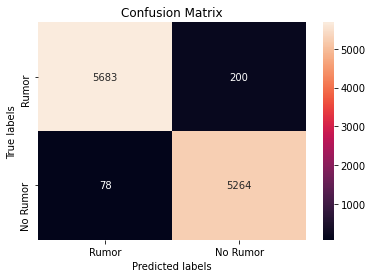

In [60]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Rumor', 'No Rumor']); ax.yaxis.set_ticklabels(['Rumor', 'No Rumor'])

## **B) NETWORK HOMOPHILY**


---


In [61]:

#Fake News Dataset
ATT_FILE= "/gdrive/My Drive/TFM/Fake.csv"

In [62]:

fake = pd.read_csv(ATT_FILE,sep=',')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [63]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z]','',text)#Removes @mentions
    text = re.sub(r'#','',text)#Removing the Hashtag
    text = re.sub(r'RT[\s]','',text)#Removing RT
    text = re.sub(r'_','',text)#Removing RT
    #text. re.sub(r'https?:\/\/\S+')#Remove the Hyper Link, in case of having one, in this case les comment it because hyper links are not in this case
    return text

### **EXAMPLES OF TWO GROUPTS WITHIN A NETWORK**

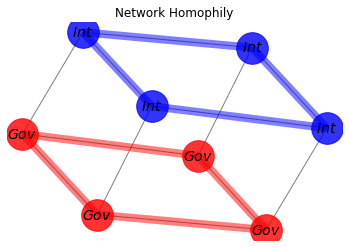

In [64]:
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=1000,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='b',
                       node_size=1000,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, alpha=0.5, edge_color='b')


# some math labels
labels = {}
labels[0] = r'$Gov$'
labels[1] = r'$Gov$'
labels[2] = r'$Gov$'
labels[3] = r'$Gov$'
labels[4] = r'$Int$'
labels[5] = r'$Int$'
labels[6] = r'$Int$'
labels[7] = r'$Int$'
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.axis('off')
plt.title('Network Homophily')
plt.show()

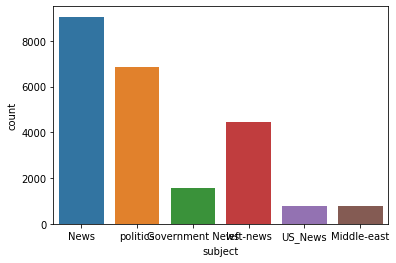

In [65]:
sns.countplot(x='subject',data=fake)

In [66]:
import copy
import collections
import networkx as nx
import random
import operator
import numpy as np

import matplotlib.pyplot  as plt
from numpy.random import choice
%matplotlib inline


In [67]:
g = nx.Graph()
g.add_nodes_from(['News', 'Politics','Government News','Left-News','US-News','Middle-east'])
print(g.nodes())

['News', 'Politics', 'Government News', 'Left-News', 'US-News', 'Middle-east']


In [68]:
g.add_edges_from([('News','Politics'), ('News','Government News'),('News','Left-News'),('News','US-News'),('News','Middle-east'),
                  ('Politics','News'), ('Politics','Government News'),('Politics','Left-News'),('Politics','US-News'),('Politics','Middle-east'),
                  ('Government News','News'), ('Government News','Politics'),('Government News','Left-News'),('Government News','US-News'),('Government News','Middle-east'),
                  ('Left-News','News'), ('Left-News','Politics'),('Left-News','Government News'),('Left-News','US-News'),('Left-News','Middle-east'),
                  ('US-News','News'), ('US-News','Politics'),('US-News','Government News'),('US-News','Left-News'),('US-News','Middle-east'),
                  ('Middle-east','News'), ('Middle-east','Politics'),('Middle-east','Government News'),('Middle-east','Left-News'),('Middle-east','US-News')])

In [69]:
color_map = []
for node in g:
    if node =='News':
        color_map.append('pink')
    elif node =='Politics': 
        color_map.append('green')
    elif node =='Government News': 
        color_map.append('red')
    elif node =='Left-News': 
        color_map.append('yellow') 
    elif node =='US-News': 
        color_map.append('orange') 
    elif node =='Middle-east': 
        color_map.append('lightblue')       


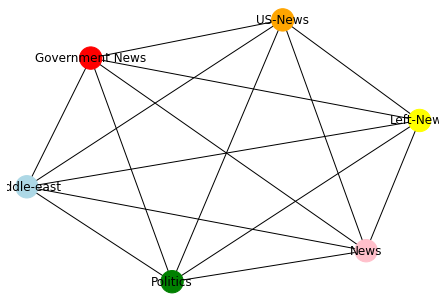

In [70]:
nx.draw(g, node_color=color_map, with_labels=True, node_size=500,edge_color='black',arrowsize=60
        )

In [71]:
G = nx.erdos_renyi_graph(20, 0.1)


# **POLITICAL BIAS BASED ON SHARED NEWS**

In [72]:
#Creating dataset
posts = fake[fake['subject']=='politics']

In [73]:
#counting the number of rows
posts['subject'].value_counts()

politics    6841
Name: subject, dtype: int64

In [74]:
#Information of the dataset
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [75]:
#Description of the dataset
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# **PRE-PROCESSING OF THE DATASET**

In [76]:
#New dataset based on posts
data = posts

In [77]:
#Creando funcion para convertir politics en 
def turning_one(value):
  if value == 'politics':
    return 1

In [78]:
#Applying function for the class
data['class'] = data['subject'].apply(turning_one)

In [79]:
#Dataset without any cleaning
sin_limpiar = data

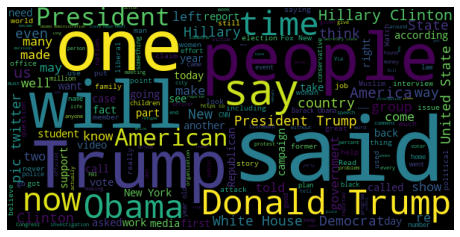

In [80]:
#WordCloudg
import matplotlib.pylab as plt
allwords = ' '.join([fk for fk in data['text']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
#Dropping columns of tittles and dates
data = data.drop(columns=['title','subject','text'])

In [82]:
#Checking the info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 9050 to 15890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6841 non-null   object
 1   class   6841 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 160.3+ KB
None


In [83]:
data['date'].describe()

count             6841
unique            1009
top       Feb 28, 2017
freq                16
Name: date, dtype: object

In [84]:
#Grouping by date
hola = data.groupby('date').sum()

In [85]:
#Converting into a New Dataframe
hola= pd.DataFrame(hola)

In [86]:
import plotly.graph_objects as go
import plotly 
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
all_words = sin_limpiar['text'].str.split(expand=True).unstack().value_counts()
datoss= [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (without cleaning) most frequent words in politics rumors texts '
)

fig = go.Figure(data=datoss, layout=layout)

iplot(fig, filename='basic-bar')

In [87]:
#Functiong for Data cleaning and Stemming
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
def prep(review):
    
    # Remove HTML tags.
    review = BeautifulSoup(review,'html.parser').get_text()
    
    # Remove non-letters
    review = re.sub("[^a-zA-Z]", " ", review)
    
    # Lower case
    review = review.lower()
    
    # Tokenize to each word.
    token = nltk.word_tokenize(review)
    
    # Stemming
    review = [nltk.stem.SnowballStemmer('english').stem(w) for w in token]
    
    # Join the words back into one string separated by space, and return the result.
    return " ".join(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
# test whether the function successfully preprocessed.
sin_limpiar['text'].iloc[:2].apply(prep).iloc[0]

'accord to the hill democrat senat bob casey is warn special counsel robert mueller against issu his russia report near the electionsen bob casey jr d pa on sunday warn special counsel robert mueller against issu a report on his find in the ongo investig of russian interfer in the elect near the upcom midterm elect speak to radio host john catsimatidi on new york radio station am casey said he couldn t make ani assumpt about where the mueller investig is go in light of indict issu on friday but he ad that he would recommend mueller not releas a report on his find near the midterm when it would distract from elect or caus peopl to question the elect s integr i don t think we ll know anywher near the full stori until mueller issu his report casey said but onc you get into the summer and you get close to the elect i think it s a mistak for him to releas it late i think you should wait until after the elect casey said'

In [89]:
# If there is no problem at the previous cell, let's apply to all the rows.
sin_limpiar['clean'] = sin_limpiar['text'].apply(prep)

In [90]:
print('shape is:',sin_limpiar.shape)

shape is: (6841, 6)


In [91]:
#Creating a cleaned dataset with "class"
limpio = sin_limpiar[['clean','class']]

## **SENTIMENT ANALYSIS WITH TF-IDF FIRST APPROACH**

In [92]:
import re
from textblob import TextBlob

In [93]:
#Create a Function to clean text, La r es para decirle a python que son caracters raw
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]','',text)#Removes @mentions
    text = re.sub(r'#','',text)#Removing the Hashtag
    text = re.sub(r'RT[\s]','',text)#Removing RT
    text = re.sub(r'_','',text)#Removing RT
    #text. re.sub(r'https?:\/\/\S+',text)#Remove the Hyper Link, in case of having one, in this case les comment it because hyper links are not in this case
    return text

In [94]:

#Clean Text function was applied to the Tweet Column valunes to get natural words. This user apparently have some typos, but it doesn`t matter 
limpio['new_clean']=limpio['clean'].apply(cleanText)
limpio['new_clean']

9050     accord to the hill democrat senat bob casey is...
9051     if we protect everi other govern build or publ...
9052     ami horowitz is fantast check out this man on ...
9053     just one more remind of whi presid trump chose...
9054     thank goodnesss jeff session is move on find o...
                               ...                        
15886    the gay mafia has a new corpor don this is the...
15887    in case you miss it sen harri reid r nv who an...
15888    noth like polit cronyism to make your stomach ...
15889    doe anyon realli think hillari clinton will co...
15890    the ironi here isn t lost on us hillari is be ...
Name: new_clean, Length: 6841, dtype: object

In [95]:
#Create a function for subectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a Function to get polarity despite that we have a column with that information
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns with that information
limpio['Subjectivity'] = limpio['new_clean'].apply(getSubjectivity)
limpio['Polarity'] = limpio['new_clean'].apply(getPolarity)
#Show the last 10
limpio.tail()

,clean,class,new_clean,Subjectivity,Polarity
15886,the gay mafia has a new corpor don this is the...,1,the gay mafia has a new corpor don this is the...,0.546591,0.074116
15887,in case you miss it sen harri reid r nv who an...,1,in case you miss it sen harri reid r nv who an...,0.553333,0.160000
15888,noth like polit cronyism to make your stomach ...,1,noth like polit cronyism to make your stomach ...,0.407197,0.232113
15889,doe anyon realli think hillari clinton will co...,1,doe anyon realli think hillari clinton will co...,0.311358,0.138642
15890,the ironi here isn t lost on us hillari is be ...,1,the ironi here isn t lost on us hillari is be ...,0.479889,0.252944


In [96]:
limpio['Polarity'].describe()

count    6841.000000
mean        0.089949
std         0.146438
min        -1.000000
25%         0.000000
50%         0.070707
75%         0.155556
max         1.000000
Name: Polarity, dtype: float64

In [97]:
#Create a function to compute, the negative, neutral and positive analysis
def getAnalysis(score):
  if score >= 0:
    return  1
  elif score <0:
    return 0
  
  
#Create a new Column based on this
limpio['Sentiment']= limpio['Polarity'].apply(getAnalysis)


,clean,class,new_clean,Subjectivity,Polarity,Sentiment
9050,accord to the hill democrat senat bob casey is...,1,accord to the hill democrat senat bob casey is...,0.614553,0.382391,1
9051,if we protect everi other govern build or publ...,1,if we protect everi other govern build or publ...,0.238095,-0.103571,0
9052,ami horowitz is fantast check out this man on ...,1,ami horowitz is fantast check out this man on ...,0.300000,0.075000,1
9053,just one more remind of whi presid trump chose...,1,just one more remind of whi presid trump chose...,0.410897,0.144231,1
9054,thank goodnesss jeff session is move on find o...,1,thank goodnesss jeff session is move on find o...,0.482143,-0.182143,0
...,...,...,...,...,...,...
15886,the gay mafia has a new corpor don this is the...,1,the gay mafia has a new corpor don this is the...,0.546591,0.074116,1
15887,in case you miss it sen harri reid r nv who an...,1,in case you miss it sen harri reid r nv who an...,0.553333,0.160000,1
15888,noth like polit cronyism to make your stomach ...,1,noth like polit cronyism to make your stomach ...,0.407197,0.232113,1
15889,doe anyon realli think hillari clinton will co...,1,doe anyon realli think hillari clinton will co...,0.311358,0.138642,1


In [98]:
#Counting Sentiment Values for the the dataset with cleaned text
limpio['Sentiment'].value_counts()

1    5628
0    1213
Name: Sentiment, dtype: int64

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [100]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(limpio.clean)
text = tfidf.transform(limpio.clean)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters


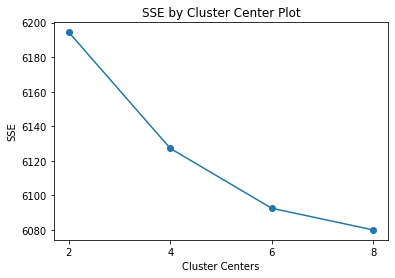

In [101]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=9).fit(text).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 9)

In [102]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=9).fit_predict(text)

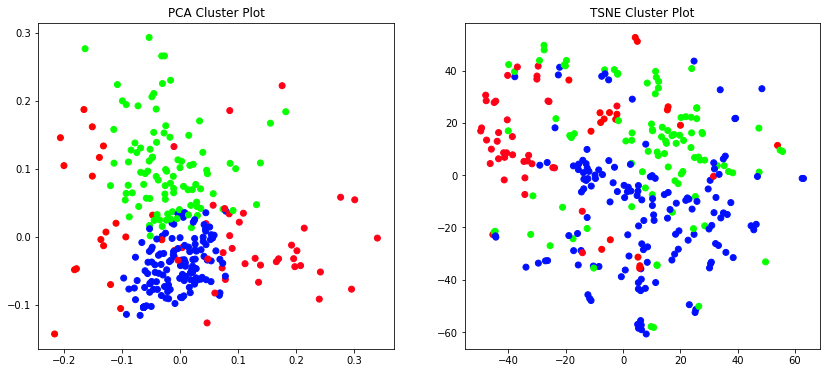

In [103]:
def plot_tsne_pca(limpio, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(limpio.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(limpio[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(limpio[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [104]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 20)


Cluster 0
octob,status,polic,hillari,ralli,septemb,black,support,januari,video,novemb,protest,trump,watch,youtub,www,https,pic,twitter,com

Cluster 1
media,report,just,news,american,hous,vote,like,say,cnn,democrat,peopl,obama,support,elect,republican,said,donald,presid,trump

Cluster 2
time,student,law,immigr,america,just,offic,like,report,presid,say,muslim,black,american,year,peopl,polic,state,obama,said

Cluster 3
just,inform,server,report,obama,secretari,presid,comey,trump,depart,investig,democrat,foundat,said,state,fbi,campaign,email,hillari,clinton


# **SENTIMENT WITH TF-IDF SECOND APPROACH**

In [105]:
from bs4 import BeautifulSoup
import re
import nltk

In [106]:
limpio.head()

,clean,class,new_clean,Subjectivity,Polarity,Sentiment
9050,accord to the hill democrat senat bob casey is...,1,accord to the hill democrat senat bob casey is...,0.614553,0.382391,1
9051,if we protect everi other govern build or publ...,1,if we protect everi other govern build or publ...,0.238095,-0.103571,0
9052,ami horowitz is fantast check out this man on ...,1,ami horowitz is fantast check out this man on ...,0.300000,0.075000,1
9053,just one more remind of whi presid trump chose...,1,just one more remind of whi presid trump chose...,0.410897,0.144231,1
9054,thank goodnesss jeff session is move on find o...,1,thank goodnesss jeff session is move on find o...,0.482143,-0.182143,0


In [107]:
#Creating a new dataframe with the same values of the cleaned dataset just for backup, and use it afterwards
X_train = limpio

In [108]:
#Renaming columns
X_train.columns = ['review','class','new_clean','Subjectivity','Polarity','Sentiment']

In [109]:
def prep(review):
    
    # Remove HTML tags.
    review = BeautifulSoup(review,'html.parser').get_text()
    
    # Remove non-letters
    review = re.sub("[^a-zA-Z]", " ", review)
    
    # Lower case
    review = review.lower()
    
    # Tokenize to each word.
    token = nltk.word_tokenize(review)
    
    # Stemming
    review = [nltk.stem.SnowballStemmer('english').stem(w) for w in token]
    
    # Join the words back into one string separated by space, and return the result.
    return " ".join(review)

In [110]:
# test whether the function successfully preprocessed.
X_train['review'].iloc[:2].apply(prep).iloc[0]

'accord to the hill democrat senat bob casey is warn special counsel robert mueller against issu his russia report near the electionsen bob casey jr d pa on sunday warn special counsel robert mueller against issu a report on his find in the ongo investig of russian interf in the elect near the upcom midterm elect speak to radio host john catsimatidi on new york radio station am casey said he couldn t make ani assumpt about where the mueller investig is go in light of indict issu on friday but he ad that he would recommend mueller not relea a report on his find near the midterm when it would distract from elect or caus peopl to question the elect s integr i don t think we ll know anywh near the full stori until mueller issu his report casey said but onc you get into the summer and you get close to the elect i think it s a mistak for him to relea it late i think you should wait until after the elect casey said'

In [111]:
# If there is no problem at the previous cell, let's apply to all the rows.
X_train['clean'] = X_train['review'].apply(prep)

In [112]:
X_train['clean'].iloc[3]

'just one more remind of whi presid trump chose the no nonsen general john kelli to be his chief of staff on thursday nov when presid trump and his team visit beij s great hall of the peopl chief of staff john kelli and a u s secret servic agent skirmish with chine secur offici over the nuclear footbal i ve spoken to five sourc familiar with the event here s what happen as they describ it the whole scuffl was over in a flash and the u s offici told about the incid were ask to keep quiet about it trump s team follow the normal secur procedur to brief the chine befor their visit to beij accord to a person familiar with the trip but somebodi at the chine end either didn t get the memo or decid to mess with the american anyway i m told that at no point did the chine have the nuclear footbal in their possess or even touch the briefca i m also told the head of the chine secur detail apolog to the american afterward for the misunderstand axio'

In [113]:
print('Training dim:',X_train.shape)


Training dim: (6841, 7)


## **TF-IDF WITH X_TRAIN CLEANED DATASET**

In [114]:
#Fitting TF-IDF
tv = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)

In [115]:
train_tv = tv.fit_transform(X_train['clean'])

In [116]:
# Create the list of vocabulary used for the vectorizer.

vocab = tv.get_feature_names()
print(vocab[:5])

['aaron', 'abandon', 'abandon the', 'abbott', 'abc']


In [117]:
print("Vocabulary length:", len(vocab))

Vocabulary length: 40000


In [118]:
dist = np.sum(train_tv, axis=0)
checking = pd.DataFrame(dist,columns = vocab)

In [119]:
checking['twitter']

0    61.540451
Name: twitter, dtype: float64

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters


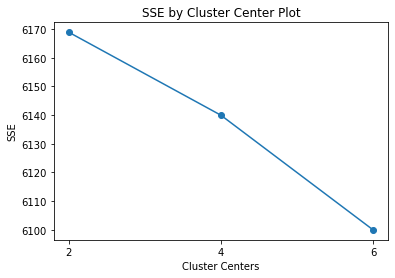

In [120]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=7).fit(train_tv).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(train_tv, 7)

In [121]:
clusters_2 = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=9).fit_predict(train_tv)

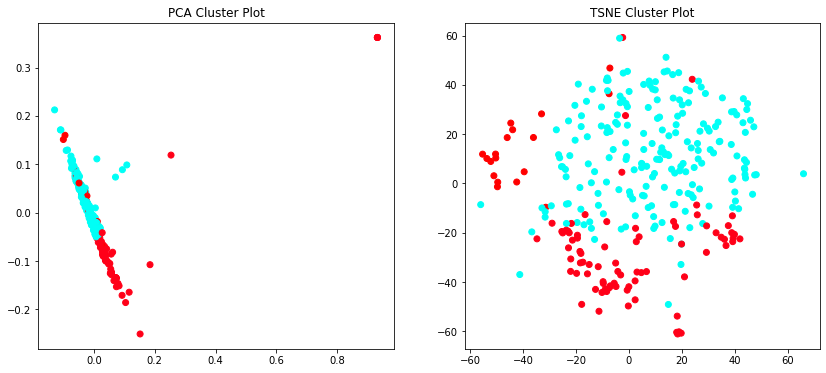

In [122]:
def plot_tsne_pca(X_train, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(X_train.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=3).fit_transform(X_train[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(X_train[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(train_tv, clusters_2)

In [124]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters_2).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(train_tv, clusters_2, tv.get_feature_names(), 50)


Cluster 0
about,his,state depart,has,were,campaign,be,have,foundat,in the,an,offici,she,not,said,he,secretari,comey,report,russian,former,from,to the,her,by,inform,as,of the,is,it,with,state,the clinton,for,depart,hillari clinton,on,the fbi,was,hillari,in,investig,that,and,email,fbi,of,to,clinton,the

Cluster 1
or,more,all,when,our,out,one,what,to the,will,peopl,her,their,but,she,about,an,presid,has,from,you,in the,by,we,at,not,they,have,are,said,who,his,this,of the,as,be,trump,with,was,he,it,for,is,on,that,in,and,of,to,the

Cluster 2
what,she,about,donald trump,we,was,at,her,here,obama,great,this is,donald,be,his,clinton,he,that,video,with,it,for,youtub,you,on,https www youtub,www,https www,www youtub,www youtub com,youtub com,youtub com watch,com watch,in,hillari,watch,is,this,and,pic,pic twitter,pic twitter com,of,https,twitter,twitter com,trump,to,com,the


In [125]:
holaa = get_top_keywords(train_tv, clusters_2, tv.get_feature_names(), 100)



Cluster 0
would,are,general,accord to,the clinton foundat,attorney,classifi,accord,privat,by the,use,fbi director,after,elect,the state depart,one,into,on the,but,hous,democrat,which,relea,secur,more,with the,news,they,time,or,been,clinton foundat,obama,who,at,that the,document,govern,russia,server,had,committ,secretari of,director,secretari of state,this,presid,of state,intellig,trump,about,his,state depart,has,were,campaign,be,have,foundat,in the,an,offici,she,not,said,he,secretari,comey,report,russian,former,from,to the,her,by,inform,as,of the,is,it,with,state,the clinton,for,depart,hillari clinton,on,the fbi,was,hillari,in,investig,that,and,email,fbi,of,to,clinton,the

Cluster 1
here,hillari,nation,donald trump,also,want,white,america,donald,news,call,democrat,becaus,over,new,re,them,which,at the,how,get,support,other,make,him,to be,for the,time,report,no,go,there,do,after,on the,just,had,obama,up,american,can,so,were,like,state,if,year,say,been,would,or,more,all,when,our,out,one,

In [126]:
#Creating dataframe for words contained in the clusters
sesgo = {
    'Cluster2':['ay','campaign','novemb','pretti','guy','will','januari','all','up','but','trump support','our','do','as','if','speech','peopl','how','they','not','hillari clinton','can','so','american','when','love','wow','cnn','https youtu be','https youtu','america','protest','youtu be','youtu','has','from','like','get','ralli','have','co','https co','who','of the','by','support','just','presid','out','are','what','she','about','donald trump','we','was','at','her','here','obama','great','this is','donald','be','his','clinton','he','that','video','with','it','for','youtub','you','on','https www youtub','www','https www','www youtub','www youtub com','youtub com','youtub com watch','com watch','in','hillari','watch','is','this','and','pic','pic twitter','pic twitter com','of','https','twitter','twitter com','trump','to','com','the'],
    'Cluster1':['here','hillari','nation','donald trump','also','want','white','america','donald','news','call','democrat','becaus','over','new','re','them','which','at the','how','get','support','other','make','him','to be','for the','time','report','no','go','there','do','after','on the','just','had','obama','up','american','can','so','were','like','state','if','year','say','been','would','or','more','all','when','our','out','one','what','to the','will','peopl','her','their','but','she','about','an','presid','has','from','you','in the','by','we','at','not','they','have','are','said','who','his','this','of the','as','be','trump','with','was','he','it','for','is','on','that','in','and','of','to','the']
}


In [127]:
sesgo = pd.DataFrame(sesgo)
sesgo['Cluster1'].value_counts()

but         1
american    1
had         1
were        1
at the      1
           ..
have        1
say         1
them        1
of          1
becaus      1
Name: Cluster1, Length: 100, dtype: int64

In [128]:
tv.get_feature_names

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=40000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>

In [129]:
X_train = X_train.drop(columns=['new_clean','Subjectivity','Polarity'])
X_train.head()

,review,class,Sentiment,clean
9050,accord to the hill democrat senat bob casey is...,1,1,accord to the hill democrat senat bob casey is...
9051,if we protect everi other govern build or publ...,1,0,if we protect everi other govern build or publ...
9052,ami horowitz is fantast check out this man on ...,1,1,ami horowitz is fantast check out this man on ...
9053,just one more remind of whi presid trump chose...,1,1,just one more remind of whi presid trump chose...
9054,thank goodnesss jeff session is move on find o...,1,0,thank goodnesss jeff session is move on find o...


In [130]:
X_train = X_train.drop(columns=['class'])

## **MODELING**

In [131]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

In [132]:
limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6841 entries, 9050 to 15890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review        6841 non-null   object 
 1   class         6841 non-null   int64  
 2   new_clean     6841 non-null   object 
 3   Subjectivity  6841 non-null   float64
 4   Polarity      6841 non-null   float64
 5   Sentiment     6841 non-null   int64  
 6   clean         6841 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 747.6+ KB


In [133]:
kfold = StratifiedKFold( n_splits = 5, random_state = 2018 )

## **LOGISTIC REGRESSION**

In [134]:
lr = LogisticRegression(random_state = 2018)

lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[6],
    'class_weight':[{1:1}],
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_CV.fit(train_tv, X_train['Sentiment'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished


{'C': 6, 'class_weight': {1: 1}, 'dual': False, 'penalty': 'l2'}


In [135]:
print(lr_CV.best_score_)

0.8308962276115299


## **Investigating Model Coefficients**

In [136]:
# Extract the coefficients from the best model Logistic Regression and sort them by index.
coefficients = logi_best.coef_
index = coefficients.argsort()

In [137]:
# Extract the feature names.
feature_names = np.array(tv.get_feature_names())

In [138]:
# From the smallest to largest.
feature_names[index][0][:30]

array(['hate', 'base', 'violent', 'the', 'bad', 'fake', 'black', 'secret',
       'wrong', 'to', 'fail', 'evil', 'worst', 'sick', 'of', 'brutal',
       'awkward', 'the worst', 'idiot', 'down', 'attack', 'stupid',
       'game', 'arrest', 'behind', 'few', 'mean', 'late', 'common',
       'secret servic'], dtype='<U37')

In [139]:
# feature names: Smallest 30 + largest 30.
feature_names_comb = list(feature_names[index][0][:30]) + list(feature_names[index][0][-31::1])

In [140]:
# coefficients magnitude: Smallest 30 + largest 30.
index_comb = list(coefficients[0][index[0][:30]]) + list(coefficients[0][index[0][-31::1]])

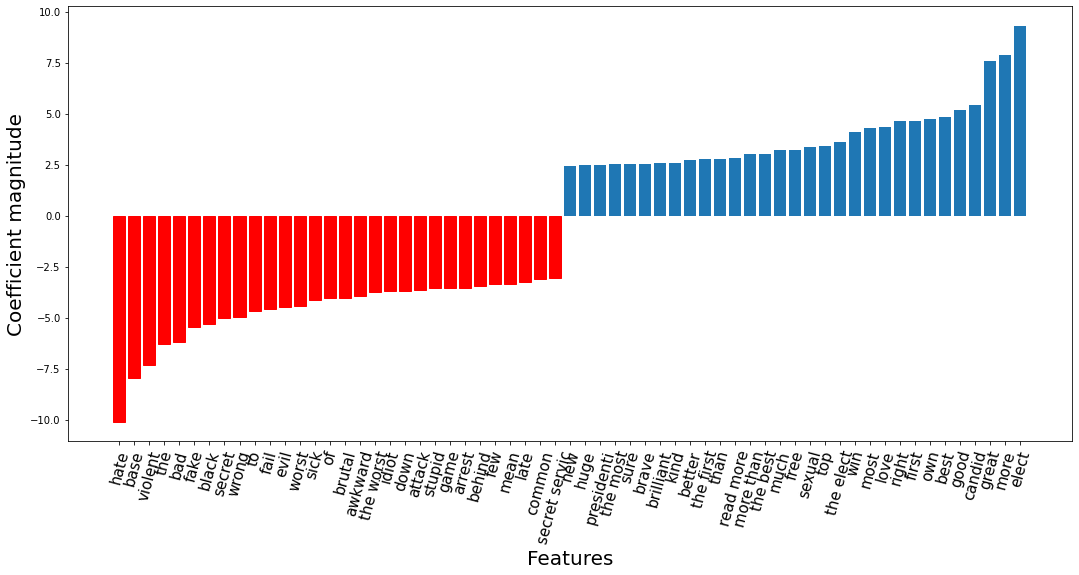

In [141]:
# Make sure the x-axis be the number from 0 to the length of the features selected not the feature names.
# Once the bar is plotted, the features are placed as ticks.
plt.figure(figsize=(18,8))
barlist = plt.bar(list(i for i in range(61)), index_comb)
plt.xticks(list(i for i in range(61)),feature_names_comb,rotation=75,size=15)
plt.ylabel('Coefficient magnitude',size=20)
plt.xlabel('Features',size=20)

# color the first smallest 30 bars red
for i in range(30):
    barlist[i].set_color('red')

plt.show()

Text(0.5, 1.0, 'Negative Sentiment vs Positive Sentiment')

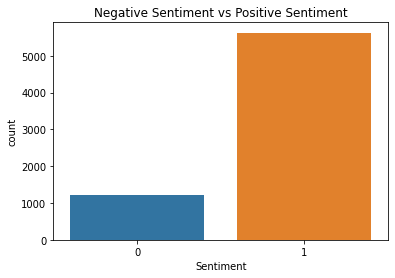

In [142]:
sns.countplot(x='Sentiment',data=X_train)
plt.title('Negative Sentiment vs Positive Sentiment')

In [143]:
#observing the type for clusters
clusters

array([2, 2, 2, ..., 2, 3, 3], dtype=int32)

# **UNSUPERVISED LEARNING FOR POLITICAL BIAS**

### **K-MEANS**

In [144]:
#Importing librarries for ML
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import KNeighborsClassifier

In [145]:
#checking the type of text
text
#Have to convert it into an array

<6841x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 762832 stored elements in Compressed Sparse Row format>

In [146]:
#Creating a new Sparse Matrix based on text
R = text

In [147]:
# let´s look for the clusters minimizing the WCSS
wcss = []
for i in range(1,5):
  kmeans=KMeans(n_clusters=i,max_iter=300)
  kmeans.fit(R)
  wcss.append(kmeans.inertia_)

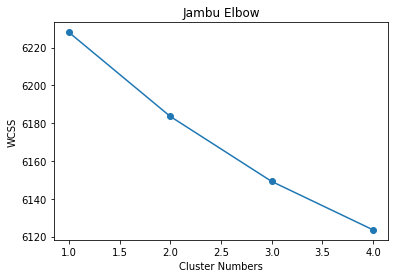

In [148]:
#Plot for Jambu Elbow
plt.plot(range(1,5),wcss,'-o')
plt.title('Jambu Elbow')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')

plt.show()

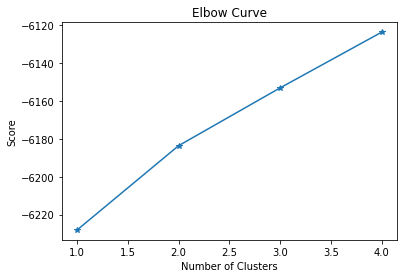

<Figure size 576x432 with 0 Axes>

In [149]:
#Plot for Elbow
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(R).score(R) for i in range(len(kmeans))]
score
plt.plot(Nc,score,'-*')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.figure(figsize=(8,6))
plt.show()

In [150]:
#fitting the K-means Algorithm
clustering = KMeans(n_clusters=3,max_iter=3000)
clustering.fit(R)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [151]:

#Añadiendo Columna para agrear los dos clusters encontrados
limpio['Kmeans_cluster'] = clustering.labels_
limpio.head(5)

,review,class,new_clean,Subjectivity,Polarity,Sentiment,clean,Kmeans_cluster
9050,accord to the hill democrat senat bob casey is...,1,accord to the hill democrat senat bob casey is...,0.614553,0.382391,1,accord to the hill democrat senat bob casey is...,0
9051,if we protect everi other govern build or publ...,1,if we protect everi other govern build or publ...,0.238095,-0.103571,0,if we protect everi other govern build or publ...,0
9052,ami horowitz is fantast check out this man on ...,1,ami horowitz is fantast check out this man on ...,0.300000,0.075000,1,ami horowitz is fantast check out this man on ...,0
9053,just one more remind of whi presid trump chose...,1,just one more remind of whi presid trump chose...,0.410897,0.144231,1,just one more remind of whi presid trump chose...,2
9054,thank goodnesss jeff session is move on find o...,1,thank goodnesss jeff session is move on find o...,0.482143,-0.182143,0,thank goodnesss jeff session is move on find o...,1


In [152]:
limpio.isna().sum().sum()

0

In [153]:
limpio.shape

(6841, 8)

In [154]:
final_clean_dataset = limpio

,review,class,new_clean,Subjectivity,Polarity,Sentiment,clean,Kmeans_cluster
9050,accord to the hill democrat senat bob casey is...,1,accord to the hill democrat senat bob casey is...,0.614553,0.382391,1,accord to the hill democrat senat bob casey is...,0
9051,if we protect everi other govern build or publ...,1,if we protect everi other govern build or publ...,0.238095,-0.103571,0,if we protect everi other govern build or publ...,0
9052,ami horowitz is fantast check out this man on ...,1,ami horowitz is fantast check out this man on ...,0.300000,0.075000,1,ami horowitz is fantast check out this man on ...,0
9053,just one more remind of whi presid trump chose...,1,just one more remind of whi presid trump chose...,0.410897,0.144231,1,just one more remind of whi presid trump chose...,2
9054,thank goodnesss jeff session is move on find o...,1,thank goodnesss jeff session is move on find o...,0.482143,-0.182143,0,thank goodnesss jeff session is move on find o...,1
...,...,...,...,...,...,...,...,...
15886,the gay mafia has a new corpor don this is the...,1,the gay mafia has a new corpor don this is the...,0.546591,0.074116,1,the gay mafia has a new corpor don this is the...,0
15887,in case you miss it sen harri reid r nv who an...,1,in case you miss it sen harri reid r nv who an...,0.553333,0.160000,1,in case you miss it sen harri reid r nv who an...,0
15888,noth like polit cronyism to make your stomach ...,1,noth like polit cronyism to make your stomach ...,0.407197,0.232113,1,noth like polit cronyism to make your stomach ...,0
15889,doe anyon realli think hillari clinton will co...,1,doe anyon realli think hillari clinton will co...,0.311358,0.138642,1,doe anyon realli think hillari clinton will co...,1


In [155]:
#Dataframe with only the clusters
kmeans_values = final_clean_dataset['Kmeans_cluster']
kmeans_values = pd.DataFrame(kmeans_values)
kmeans_values = kmeans_values.reset_index(drop=True)

In [156]:

#equating X with R for TSNE graph
X = R

In [157]:

#Creando Dataset con los componententes 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.decomposition import SparsePCA
from sklearn.random_projection import sparse_random_matrix
pca_a = PCA(n_components=3) #grafico 2d
pca_review = pca_a.fit_transform(R.toarray())


In [158]:
#Dataframe with Components and K_means Clusters
pca_review_df = pd.DataFrame(data= pca_review, columns= ['Component1','Component2','Component3'])
pca_name_review = pd.concat([pca_review_df, kmeans_values[['Kmeans_cluster']]],axis=1)

In [159]:
pca_name_review['Kmeans_cluster'].value_counts()

0    4147
2    1780
1     914
Name: Kmeans_cluster, dtype: int64

In [160]:
#Shape of the dataframe
pca_name_review.shape

(6841, 4)

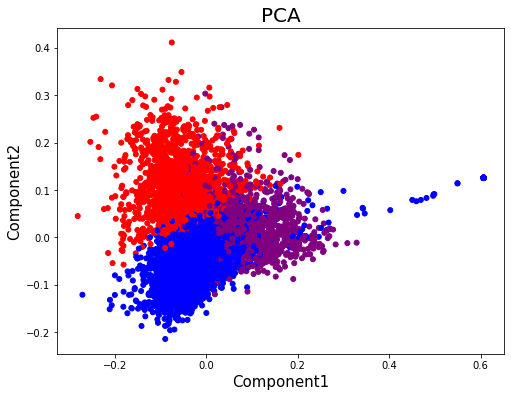

In [161]:
#PCA plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component1',fontsize=15)
ax.set_ylabel('Component2',fontsize=15)
ax.set_title('PCA',fontsize ='20')


color_theme = np.array(['blue','purple','red','green'])
ax.scatter(x=pca_name_review.Component2, y=pca_name_review.Component3,c=color_theme[pca_name_review.Kmeans_cluster],s=25)

plt.show()


In [162]:
import numpy as np
from sklearn.manifold import TSNE
X = R
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded.shape


(6841, 3)

In [163]:
#Creating a dataframe for the TSN
tsn_review_df = pd.DataFrame(data= X_embedded, columns= ['Component1','Component2','Component3'])
tsn_name_review = pd.concat([tsn_review_df, kmeans_values[['Kmeans_cluster']]],axis=1)
tsn_name_review

,Component1,Component2,Component3,Kmeans_cluster
0,-8.053816,8.085612,33.708092,0
1,-55.241554,5.619122,7.035039,0
2,27.643639,-35.756775,38.549885,0
3,-10.342100,2.484207,-21.879568,2
4,4.894087,12.310075,4.697934,1
...,...,...,...,...
6836,31.156771,-17.290493,-13.221272,0
6837,-14.967863,-21.282988,42.782623,0
6838,-4.364196,-39.712589,21.395741,0
6839,22.214874,-29.511269,16.982983,1


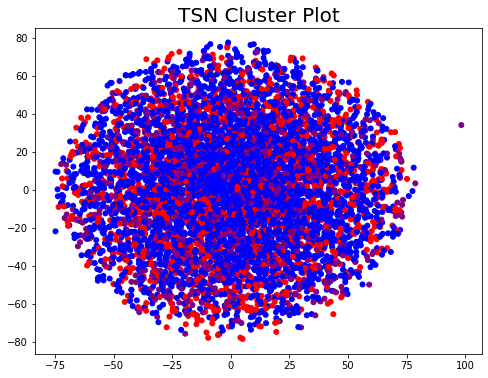

In [164]:
#TSNE plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_title('TSN Cluster Plot',fontsize ='20')
color_theme = np.array(['blue','purple','red','green'])
ax.scatter(x=tsn_name_review.Component1, y=tsn_name_review.Component2,c=color_theme[pca_name_review.Kmeans_cluster],s=25,alpha=1)

plt.show()

In [165]:
pca_name_review['pca-one'] = pca_review[:,0]
pca_name_review['pca-two'] = pca_review[:,1] 
pca_name_review['pca-three'] = pca_review[:,2]
print('Explained variation per principal component: {}'.format(pca_a.explained_variance_ratio_))


Explained variation per principal component: [0.00982378 0.00850848 0.00800559]


In [166]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(pca_name_review.shape[0])

In [275]:
#Creating Herarchical dataset
hierarchical = pca_name_review.drop(columns=['pca-one','pca-two','pca-three'])
hierarchical.columns = ['value_one','value_two','value_three','target']

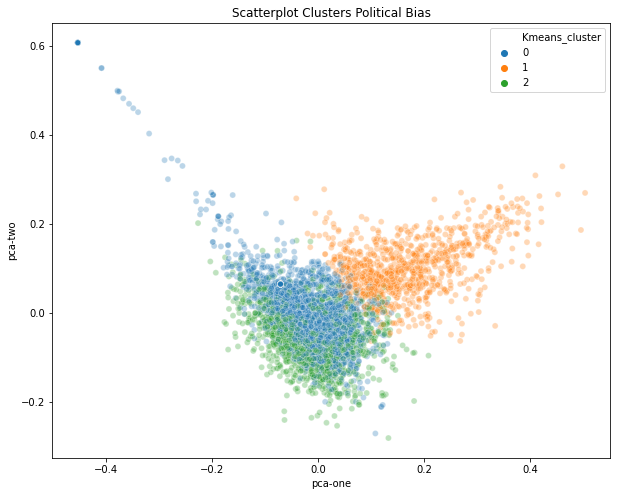

In [168]:
plt.figure(figsize=(10,8))
plt.title('Scatterplot Clusters Political Bias')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='Kmeans_cluster',
    palette=sns.color_palette('tab10', 3),
    data=pca_name_review.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

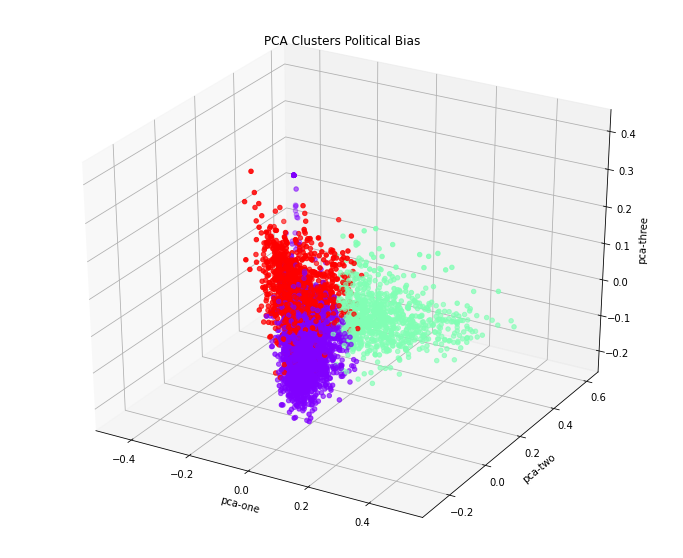

In [169]:
ax = plt.figure(figsize=(12,10)).gca(projection='3d')
ax.scatter(
    xs=pca_name_review.loc[rndperm,:]["pca-one"], 
    ys=pca_name_review.loc[rndperm,:]["pca-two"], 
    zs=pca_name_review.loc[rndperm,:]["pca-three"], 
    c=pca_name_review.loc[rndperm,:]["Kmeans_cluster"], 
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title('PCA Clusters Political Bias')
plt.show()

#### **ACCURACY FOR K-MEANS**

In [266]:
k_means_accuracy = pca_name_review
k_means_accuracy = k_means_accuracy.drop(columns=['pca-one','pca-two','pca-three'])
from sklearn.model_selection import train_test_split


In [267]:
x_kmeans = k_means_accuracy.iloc[:,:3]


In [268]:
#Target Varialbe
y_kmeans =k_means_accuracy.iloc[:,-1]
k_means_predicted_labels = clustering.labels_

In [303]:
#Confusion Matrix
cmk= confusion_matrix(y_kmeans,k_means_predicted_labels)

[Text(0, 0.5, 'Democrats'),
 Text(0, 1.5, 'Neutral'),
 Text(0, 2.5, 'Republicans')]

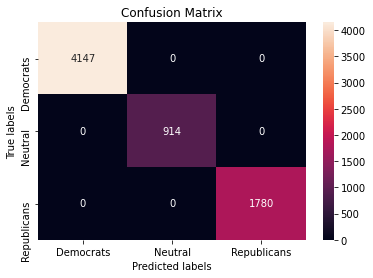

In [305]:
ax= plt.subplot()
sns.heatmap(cmk, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Democrats', 'Neutral','Republicans']); ax.yaxis.set_ticklabels(['Democrats', 'Neutral','Republicans'])

In [272]:
accuracy_score(y_kmeans,k_means_predicted_labels)

1.0

In [301]:
print(classification_report(y_kmeans, k_means_predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4147
           1       1.00      1.00      1.00       914
           2       1.00      1.00      1.00      1780

    accuracy                           1.00      6841
   macro avg       1.00      1.00      1.00      6841
weighted avg       1.00      1.00      1.00      6841



## **HIERARCHICHAL CLUSTERING**

In [273]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [276]:
X_hierarchichal = hierarchical.iloc[:,:3]

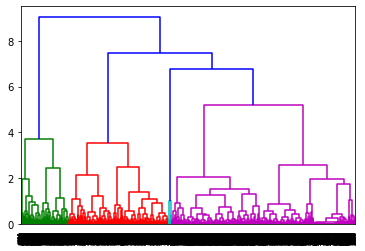

In [314]:
dendrogram = sch.dendrogram(sch.linkage(X_hierarchichal, method='ward'))

In [280]:
model_h = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_h.fit(X_hierarchichal)
labels = model_h.labels_

In [310]:
y_hiera = hierarchical.iloc[:,-1]
#Confusion Matrix
cmh= confusion_matrix(y_hiera,labels)

[Text(0, 0.5, 'Democrats'),
 Text(0, 1.5, 'Neutral'),
 Text(0, 2.5, 'Republicans'),
 Text(0, 3.5, 'not identified')]

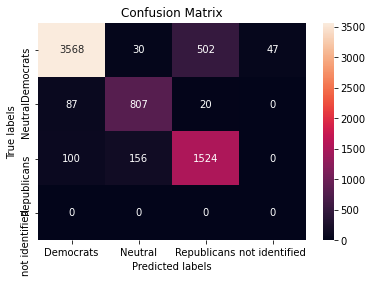

In [311]:
ax= plt.subplot()
sns.heatmap(cmh, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Democrats', 'Neutral','Republicans','not identified']); ax.yaxis.set_ticklabels(['Democrats', 'Neutral','Republicans','not identified'])

In [315]:
accuracy_score(y_hiera,labels)

0.8623008332115187

In [302]:
print(classification_report(y_hiera, labels))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      4147
           1       0.81      0.88      0.85       914
           2       0.74      0.86      0.80      1780
           3       0.00      0.00      0.00         0

    accuracy                           0.86      6841
   macro avg       0.63      0.65      0.64      6841
weighted avg       0.88      0.86      0.87      6841



## **CHECKING THE RELEVANT WORDS FOR EACH CLUSTER**

In [171]:
id_cluster_0 = limpio[limpio['Kmeans_cluster']==0]
id_cluster_1 = limpio[limpio['Kmeans_cluster']==1]
id_cluster_2 = limpio[limpio['Kmeans_cluster']==2]

## **TF-IDF FOR DEMOCRATS, NEUTRAL AND REPUBLICANS**

In [172]:
cluster0_tf = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 8000)

In [173]:
train_cluster0_tf = cluster0_tf.fit_transform(limpio['clean'])

In [174]:
vocab_cluster0 = cluster0_tf.get_feature_names()
print(vocab_cluster0[:20])

['abandon', 'abc', 'abc news', 'abedin', 'abid', 'abil', 'abil to', 'abl', 'abl to', 'abort', 'about', 'about her', 'about hillari', 'about him', 'about his', 'about how', 'about it', 'about presid', 'about that', 'about the']


In [175]:
dist_clust0 = np.sum(train_cluster0_tf, axis=0)
checking_clust0 = pd.DataFrame(dist_clust0,columns = vocab_cluster0)

In [176]:
checking_clust0

,abandon,abc,abc news,abedin,abid,abil,abil to,abl,abl to,abort,about,about her,about hillari,about him,about his,about how,about it,about presid,about that,about the,about their,about this,about to,about trump,about what,about whether,abov,abov the,abroad,absolut,abus,abus of,academ,academi,accept,accept the,access,access to,access to the,accid,...,you go,you have,you have to,you just,you know,you ll,you look,you may,you might,you need,you re,you re go,you re not,you say,you see,you should,you that,you the,you think,you to,you ve,you want,you want to,you were,you will,you would,young,young peopl,younger,your,your own,yourself,youth,youtu,youtu be,youtub,youtub com,youtub com watch,zero,zone
0,3.979105,17.215437,8.67889,9.835506,4.499697,9.870345,8.550261,23.064909,22.297936,11.59867,117.869631,10.650408,6.009324,3.989656,12.620196,15.263299,12.871001,4.448377,6.157652,47.207161,5.572048,10.995833,8.540648,10.21064,10.748332,4.322172,11.822844,3.865294,3.317782,13.700585,12.970141,2.921684,3.473667,3.460895,19.097322,4.083875,14.058062,9.146166,3.315319,4.778103,...,5.62522,19.649697,8.604901,5.487489,22.284812,12.39217,4.560757,4.487094,4.718613,5.618451,29.009833,3.746458,3.649254,3.80385,6.279527,6.197069,5.085113,4.251686,13.378226,11.360154,10.5361,11.348985,7.711018,5.1774,9.548002,5.462439,29.559403,5.852384,3.716547,53.68861,4.283722,7.481406,6.066115,18.115013,17.997412,28.777076,24.4542,24.4542,7.587104,6.059729


In [ ]:
# def find_optimal_clusters(data, max_k):
#     iters = range(2, max_k+1, 2)
    
#     sse = []
#     for k in iters:
#         sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=7).fit(train_cluster0_tf).inertia_)
#         print('Fit {} clusters'.format(k))
        
#     f, ax = plt.subplots(1, 1)
#     ax.plot(iters, sse, marker='o')
#     ax.set_xlabel('Cluster Centers')
#     ax.set_xticks(iters)
#     ax.set_xticklabels(iters)
#     ax.set_ylabel('SSE')
#     ax.set_title('SSE by Cluster Center Plot')
    
# find_optimal_clusters(train_cluster0_tf, 7)

In [177]:
clusters_0 = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=9).fit_predict(train_cluster0_tf)

In [178]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters_0).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(train_cluster0_tf, clusters_0, cluster0_tf.get_feature_names(), 100)


Cluster 0
we,new,for the,public,use,when,also,and the,elect,accord to,are,by the,secur,into,accord,after,would,hous,one,on the,relea,democrat,clinton foundat,with the,news,but,more,which,committ,intellig,server,or,document,time,they,russia,secretari of,govern,director,been,that the,obama,secretari of state,who,of state,state depart,trump,foundat,at,had,presid,comey,this,were,offici,secretari,his,about,be,has,russian,have,campaign,in the,an,not,he,said,inform,report,she,former,to the,by,from,her,as,depart,of the,is,it,state,the fbi,with,the clinton,hillari clinton,for,on,was,investig,hillari,fbi,email,that,in,and,of,to,the,clinton

Cluster 1
take,news,know,which,want,them,becaus,new,over,here,other,at the,call,clinton,democrat,re,him,america,support,get,donald trump,make,report,how,to be,for the,time,donald,no,go,there,after,had,were,on the,hillari,do,up,state,year,been,just,or,can,say,would,so,american,if,like,more,all,when,one,our,obama,to the,out,will,what,peopl,their,her,but,an,she

In [316]:
#CLUSTER 0 == CLUSTER FOR DEMOCRATS
grupos_features_c0 = {
    'CLUSTER0':['we','new','for the','public','use','when','also','and the','elect','accord to','are','by the','secur','into','accord','after','would','hous','one','on the','relea','democrat','clinton', 'foundat','news','but','more','committ','intellig','server','or','document','time','they','russia','secretari','govern','director','been','obama','secretari','state','who','state','state depart','trump','foundat','at','presid','comey','offici','secretari','his','be','has','russian','campaign','said','inform','report','former','from','depart','is','it','state','fbi','clinton','hillari', 'clinton','for','on','was','investig','hillari','fbi','email','clinton']}

In [317]:
grupos_features0 = pd.DataFrame(grupos_features_c0)
grupos_features0['CLUSTER0'].value_counts()

clinton         4
secretari       3
state           3
foundat         2
hillari         2
               ..
comey           1
russia          1
state depart    1
public          1
and the         1
Name: CLUSTER0, Length: 68, dtype: int64

Text(0.5, 1.0, 'IMPORTANT FEATURES FOR CLUSTER 0 "DEMOCRATS"')

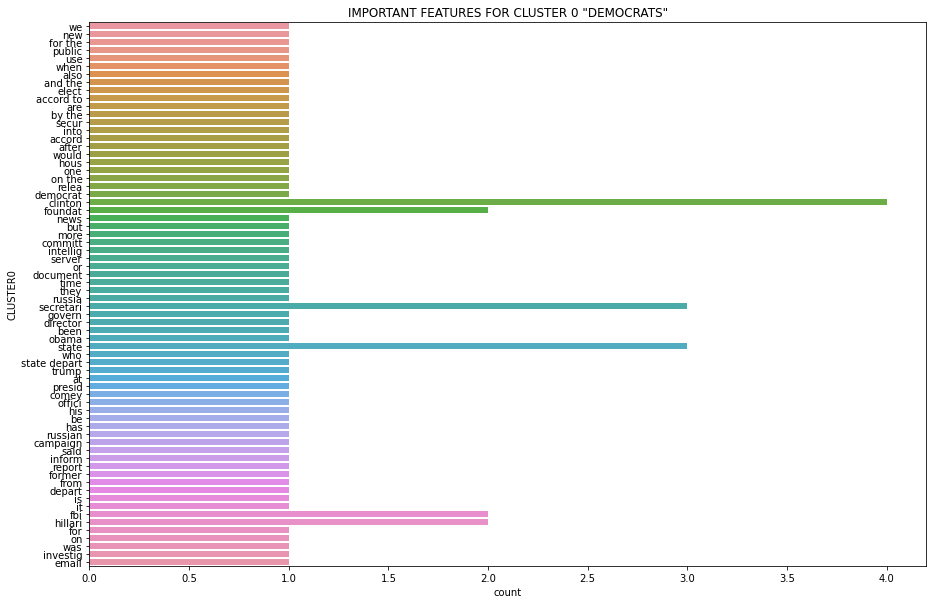

In [329]:
plt.figure(figsize=(15,10))
sns.countplot(y='CLUSTER0',data=grupos_features0)
plt.title('IMPORTANT FEATURES FOR CLUSTER 0 "DEMOCRATS"')



In [338]:
grupos_features1={'CLUSTER1':['take','news','know','want','them','new','over','here','other','call','clinton','democrat','re','him','america','support','get','donald trump','make','report','how','time','donald','no','go','there','after','had','were','hillari','do','up','state','year','been','just','or','trump','can','say','would','so','american','if','like','more','all','when','donald','one','our','obama','out','people','she','presid','in','by','they','not','trump','he','it','republican']}


In [339]:
grupos_features1 =pd.DataFrame(grupos_features1)


<Figure size 864x576 with 0 Axes>

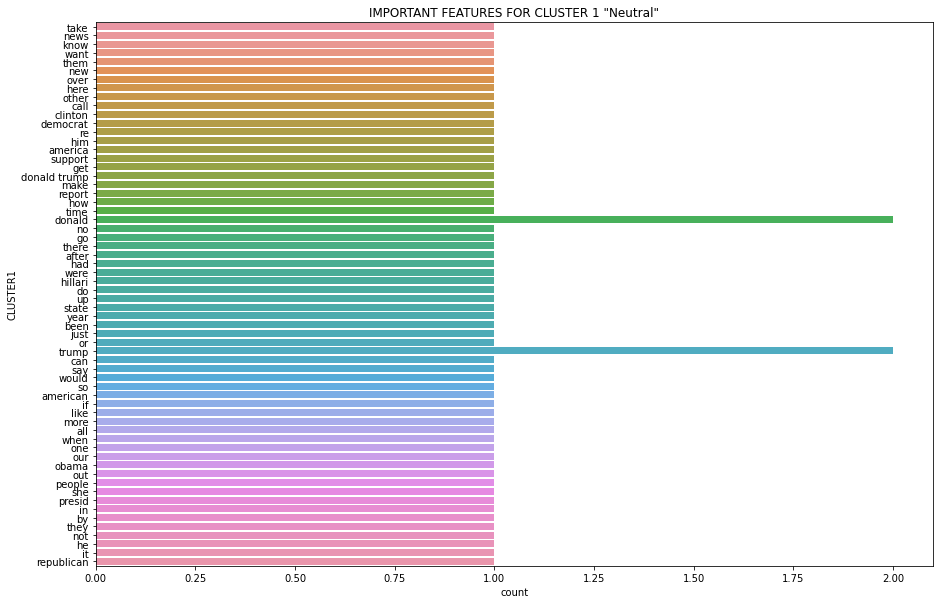

<Figure size 864x576 with 0 Axes>

In [341]:
plt.figure(figsize=(15,10))
sns.countplot(y='CLUSTER1',data=grupos_features1)
plt.title('IMPORTANT FEATURES FOR CLUSTER 1 "Neutral"')
plt.figure(figsize=(12,8))

In [342]:
grupos_features2={
    'CLUSTER2':['one','polic','white','report','time','an','clinton','fox','august','like','march','crowd','status','our','up','black','just','people','after','not','donald', 'trump','when','tweet','decemb','from','news','september','get','as','ralli','realdonaldtrump','donald','have','about','what','out','januari','she','httpstwittercom','httpstwitter','octob','trump',' support','presid', 'trump','cnn','support','novemb','hillari','her','here','he','be','video','his','with','protest','was','presid','at','you','that','co','httpsco','youtub','httpswwwyoutub','httpswww','www,youtubcom','youtubcom', 'watch','wwwyoutub','comwatch','wwwyoutubcom','watch','to','trump','https','pic','twitter','twitter','twitter','twitter','com']}

In [343]:
#Republicans Dataset
grupos_features2 = pd.DataFrame(grupos_features2)

Text(0.5, 1.0, 'IMPORTANT FEATURES FOR CLUSTER 2 "Republicans"')

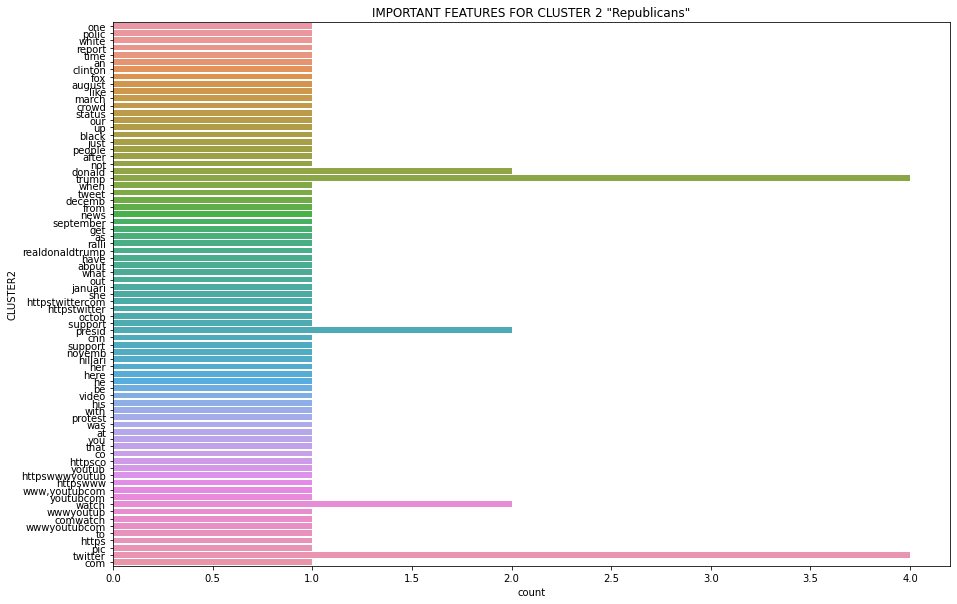

In [352]:
plt.figure(figsize=(15,10))
sns.countplot(y='CLUSTER2',data=grupos_features2)
plt.title('IMPORTANT FEATURES FOR CLUSTER 2 "Republicans"')


In [191]:
#Creating a new dataframe
limpio.to_csv(r'/gdrive/My Drive/TFM/cluster_data.csv', index = False)

## **C) SIR MODEL**

---

# Models as State Transitions
As a quick recap, take a look at the variables we defined:

**N**: total population

**S(t)**: number of people susceptible on day t

**I(t)**: number of people infected on day t

**R(t)**: number of people recovered on day t

**β**: expected amount of people an infected person infects per day

**D**: number of days an infected person has and can spread the disease


**γ**: the proportion of infected recovering per day (γ = 1/D)

**R₀**: the total number of people an infected person infects (R₀ = β / γ)
And here are the basic equations again

In [192]:
#Fake News Dataset
cldt= "/gdrive/My Drive/TFM/clustered_datatype.xlsx" 

In [193]:
clustered_datatype = pd.read_excel(cldt)
clustered_datatype.head()

,date,review,class,new_clean,Subjectivity,Polarity,Sentiment,clean,Kmeans_cluster,PoliticalBias
0,2018-02-19,accord to the hill democrat senat bob casey is...,1,accord to the hill democrat senat bob casey is...,0.614553,0.382391,1,accord to the hill democrat senat bob casey is...,0,Democrat
1,2018-02-19,if we protect everi other govern build or publ...,1,if we protect everi other govern build or publ...,0.238095,-0.103571,0,if we protect everi other govern build or publ...,0,Democrat
2,2018-02-19,ami horowitz is fantast check out this man on ...,1,ami horowitz is fantast check out this man on ...,0.300000,0.075000,1,ami horowitz is fantast check out this man on ...,0,Democrat
3,2018-02-18,just one more remind of whi presid trump chose...,1,just one more remind of whi presid trump chose...,0.410897,0.144231,1,just one more remind of whi presid trump chose...,1,Neutral
4,2018-02-18,thank goodnesss jeff session is move on find o...,1,thank goodnesss jeff session is move on find o...,0.482143,-0.182143,0,thank goodnesss jeff session is move on find o...,2,Republican


Text(0.5, 1.0, 'RUMORS POLITICAL BIAS')

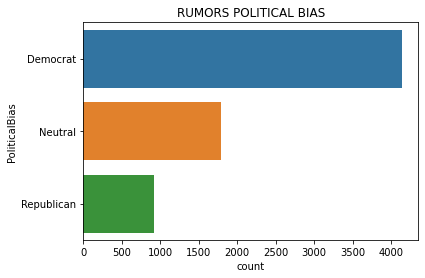

In [194]:
sns.countplot(y='PoliticalBias',data=clustered_datatype)
plt.title('RUMORS POLITICAL BIAS')

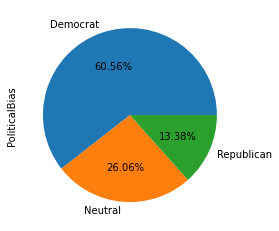

In [195]:
color=['Blue','Orange','Red']
plot = clustered_datatype['PoliticalBias'].value_counts().plot.pie(subplots=False, figsize=(7, 4),autopct='%1.2f%%')

In [196]:
#Creating a Dataframe to separte them afterwards
result= clustered_datatype

## **GLOBAL EXPLORATORY ANALYSIS**

In [197]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841 entries, 0 to 6840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6836 non-null   datetime64[ns]
 1   review          6433 non-null   object        
 2   class           6841 non-null   int64         
 3   new_clean       6433 non-null   object        
 4   Subjectivity    6841 non-null   float64       
 5   Polarity        6841 non-null   float64       
 6   Sentiment       6841 non-null   int64         
 7   clean           6433 non-null   object        
 8   Kmeans_cluster  6841 non-null   int64         
 9   PoliticalBias   6841 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 534.6+ KB


In [198]:
result.columns = ['date','review','Rumors','new_clean','Subjectivity','Polarity','Sentiment','clean','Kmeans_cluster','PoliticalBias']
result = result.sort_values(['date'])
result_porfecha = result.groupby('date').sum()
result_porfecha['Confirmed'] = result_porfecha['Rumors'].cumsum()

Text(0.5, 1.0, 'GLOBAL COUNT OF RUMOR SPREAD GROUPED BY DATE')

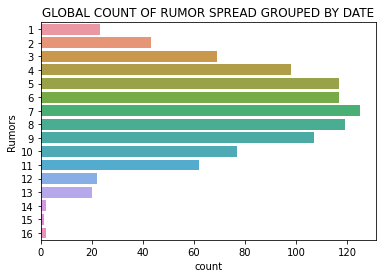

In [354]:
sns.countplot(y='Rumors',data=result_porfecha)
plt.title('GLOBAL COUNT OF RUMOR SPREAD GROUPED BY DATE')

In [200]:
result_porfecha.describe()

,Rumors,Subjectivity,Polarity,Sentiment,Kmeans_cluster,Confirmed
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,6.808765,2.535498,0.612658,5.600598,3.597610,3021.005976
std,2.870290,1.142703,0.464698,2.629846,3.019286,2088.261131
min,1.000000,0.000000,-1.441761,0.000000,0.000000,6.000000
25%,5.000000,1.660966,0.249806,4.000000,1.000000,1099.500000
50%,7.000000,2.483118,0.550284,5.500000,3.000000,2697.000000
75%,9.000000,3.305718,0.894449,7.000000,5.000000,4881.750000
max,16.000000,6.160448,2.349256,14.000000,19.000000,6836.000000


In [201]:
result_tendencia = result_porfecha.drop(columns=['Subjectivity','Polarity','Sentiment','Kmeans_cluster'])
result_tendencia_2 =result_tendencia.drop(columns=['Confirmed'])
result_tendencia = result_tendencia.drop(columns=['Rumors'])

Text(0.5, 0, 'DATE')

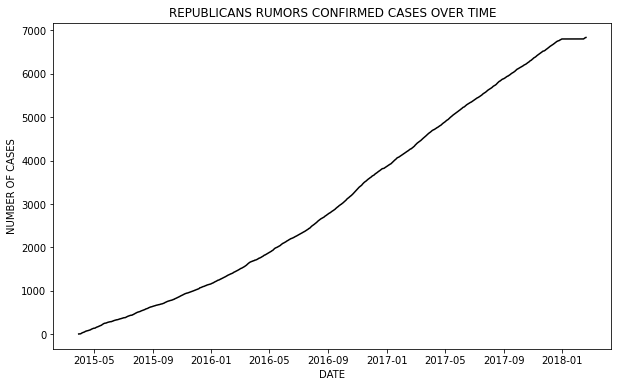

In [226]:
plt.figure(figsize=(10,6))
sns.lineplot(x=result_tendencia.index,y='Confirmed',data=result_tendencia,color='black')
plt.title('REPUBLICANS RUMORS CONFIRMED CASES OVER TIME')
plt.ylabel('NUMBER OF CASES')
plt.xlabel('DATE')

In [203]:
#Creating a dataframe for each political bias
democratas = result[result['PoliticalBias']=='Democrat']
republicanos = result[result['PoliticalBias']=='Republican']
neutrales = result[result['PoliticalBias']=='Neutral']

## **DEMOCRATS**

In [204]:
democratas.columns = ['date','review','Rumors','new_clean','Subjectivity','Polarity','Sentiment','clean','Kmeans_cluster','PoliticalBias']
democratas = democratas.sort_values(['date'])
democratas_porfecha = democratas.groupby('date').sum()
democratas_porfecha['Confirmed'] = democratas_porfecha['Rumors'].cumsum()

Text(0.5, 1.0, 'COUNT OF RUMOR SPREAD FOR DEMOCRATS GROUPED BY DATE')

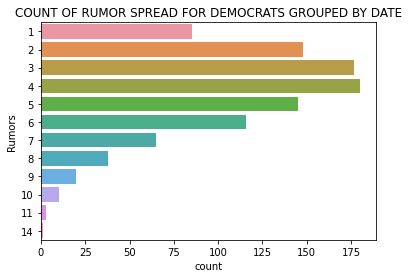

In [205]:
sns.countplot(y='Rumors',data=democratas_porfecha)
plt.title('COUNT OF RUMOR SPREAD FOR DEMOCRATS GROUPED BY DATE')

In [206]:
#GROUPING BY DATE DEMOCRAT RUMORS
democratas_tendencia = democratas_porfecha.drop(columns=['Subjectivity','Polarity','Sentiment','Kmeans_cluster'])
democratas_tendencia_2 = democratas_tendencia.drop(columns=['Confirmed'])
democratas_tendencia = democratas_tendencia.drop(columns=['Rumors'])

Text(0.5, 0, 'DATE')

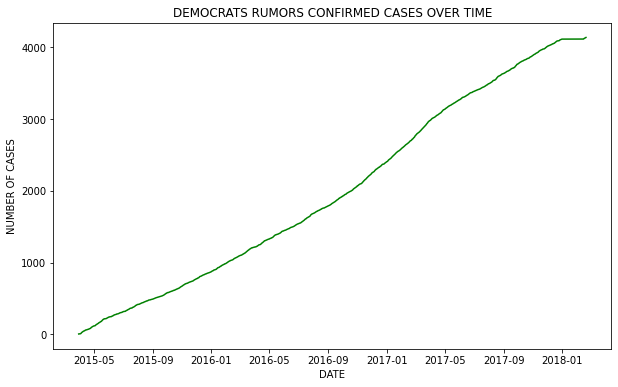

In [225]:
plt.figure(figsize=(10,6))
sns.lineplot(x=democratas_tendencia.index,y='Confirmed',data=democratas_tendencia,color='green')
plt.title('DEMOCRATS RUMORS CONFIRMED CASES OVER TIME')
plt.ylabel('NUMBER OF CASES')
plt.xlabel('DATE')

## **NEUTRAL**

In [209]:
neutrales.columns = ['date','review','Rumors','new_clean','Subjectivity','Polarity','Sentiment','clean','Kmeans_cluster','PoliticalBias']
neutrales = neutrales.sort_values(['date'])
neutrales_porfecha = neutrales.groupby('date').sum()

In [210]:
neutrales_porfecha['Confirmed'] = neutrales_porfecha['Rumors'].cumsum()

Text(0.5, 1.0, 'COUNT OF RUMOR SPREAD FOR NEUTRAL BIAS GROUPED BY DATE')

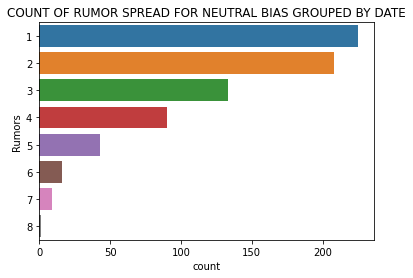

In [211]:
sns.countplot(y='Rumors',data=neutrales_porfecha)
plt.title('COUNT OF RUMOR SPREAD FOR NEUTRAL BIAS GROUPED BY DATE')

In [214]:
#Creandp dataset para visualizar tendencia de rumores por fecha
neutrales_tendencia = neutrales_porfecha.drop(columns=['Subjectivity','Polarity','Sentiment','Kmeans_cluster'])
neutrales_tendencia_2 = neutrales_tendencia.drop(columns=['Confirmed'])
neutrales_tendencia= neutrales_tendencia.drop(columns=['Rumors'])

Text(0.5, 0, 'DATE')

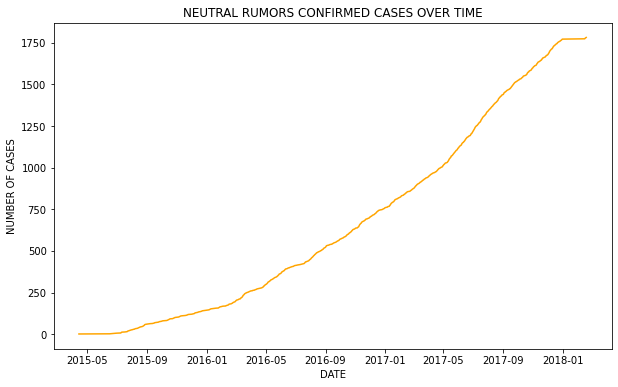

In [224]:
plt.figure(figsize=(10,6))
sns.lineplot(x=neutrales_tendencia.index,y='Confirmed',data=neutrales_tendencia, color='orange')
plt.title('NEUTRAL RUMORS CONFIRMED CASES OVER TIME')
plt.ylabel('NUMBER OF CASES')
plt.xlabel('DATE')

## **REPUBLICANS**

In [216]:
republicanos = republicanos.sort_values(['date'])
republicanos.columns = ['date','review','Rumors','new_clean','Subjectivity','Polarity','Sentiment','clean','Kmeans_cluster','PoliticalBias']
republicanos_porfecha = republicanos.groupby('date').sum()
republicanos_porfecha['Confirmed'] = republicanos_porfecha['Rumors'].cumsum()

Text(0.5, 1.0, 'COUNT OF RUMOR SPREAD FOR REPUBLICANS GROUPED BY DATE')

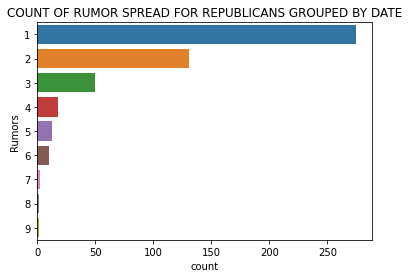

In [217]:
sns.countplot(y='Rumors',data=republicanos_porfecha)
plt.title('COUNT OF RUMOR SPREAD FOR REPUBLICANS GROUPED BY DATE')

In [219]:
republicans_tendencia = republicanos_porfecha.drop(columns=['Subjectivity','Polarity','Sentiment','Kmeans_cluster'])
republicans_tendencia_2= republicans_tendencia.drop(columns=['Confirmed'])
republicans_tendencia = republicans_tendencia.drop(columns=['Rumors'])

Text(0.5, 0, 'DATE')

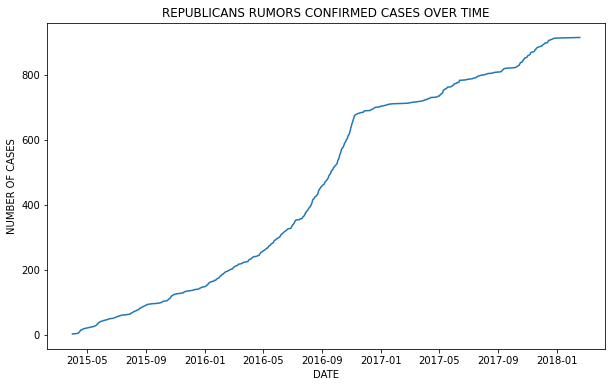

In [223]:
plt.figure(figsize=(10,6))
sns.lineplot(x=republicans_tendencia.index,y='Confirmed',data=republicans_tendencia)
plt.title('REPUBLICANS RUMORS CONFIRMED CASES OVER TIME')
plt.ylabel('NUMBER OF CASES')
plt.xlabel('DATE')

Text(0, 0.5, 'RUMOR BEHAVIOR')

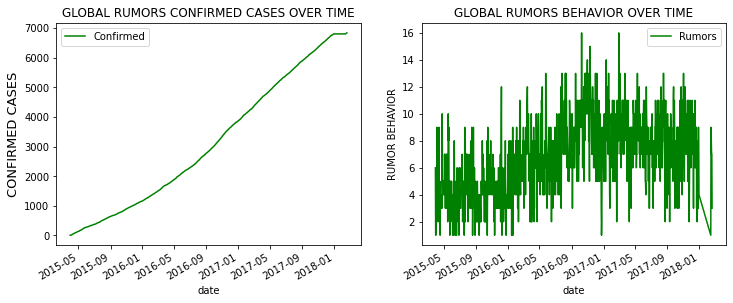

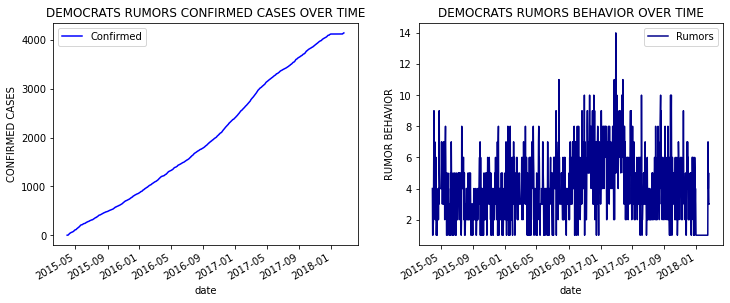

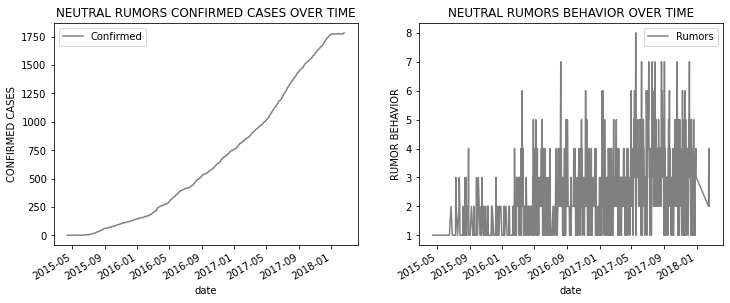

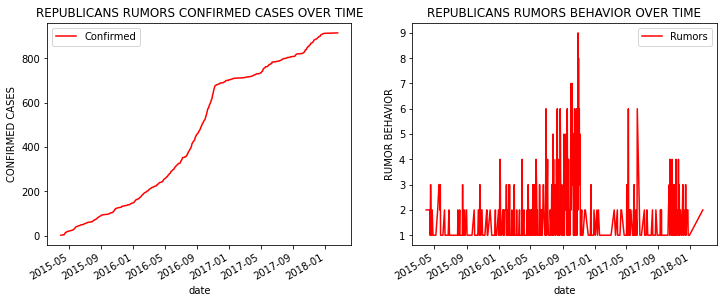

In [227]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
result_tendencia.plot(ax=plt.gca(), title='GLOBAL RUMORS CONFIRMED CASES OVER TIME',color='green')
plt.ylabel("CONFIRMED CASES",size=13)


plt.subplot(2, 2, 2)
result_tendencia_2.plot(ax=plt.gca(), title='GLOBAL RUMORS BEHAVIOR OVER TIME',color='green')
plt.ylabel('RUMOR BEHAVIOR')

plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
democratas_tendencia.plot(ax=plt.gca(), title='DEMOCRATS RUMORS CONFIRMED CASES OVER TIME',color='blue')
plt.ylabel("CONFIRMED CASES")


plt.subplot(2, 2, 2)
democratas_tendencia_2.plot(ax=plt.gca(), title='DEMOCRATS RUMORS BEHAVIOR OVER TIME',color='darkblue')
plt.ylabel("RUMOR BEHAVIOR")

plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
neutrales_tendencia.plot(ax=plt.gca(), title='NEUTRAL RUMORS CONFIRMED CASES OVER TIME',color='gray')
plt.ylabel("CONFIRMED CASES")


plt.subplot(2, 2, 2)
neutrales_tendencia_2.plot(ax=plt.gca(), title='NEUTRAL RUMORS BEHAVIOR OVER TIME',color='gray')
plt.ylabel("RUMOR BEHAVIOR")



plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
republicans_tendencia.plot(ax=plt.gca(), title='REPUBLICANS RUMORS CONFIRMED CASES OVER TIME',color='red')
plt.ylabel("CONFIRMED CASES")


plt.subplot(2, 2, 2)
republicans_tendencia_2.plot(ax=plt.gca(), title='REPUBLICANS RUMORS BEHAVIOR OVER TIME',color='red')
plt.ylabel("RUMOR BEHAVIOR")

## **SIR FOR GLOBAL POPULATION**

Text(0.5, 1.0, 'GLOBAL SIR MODEL')

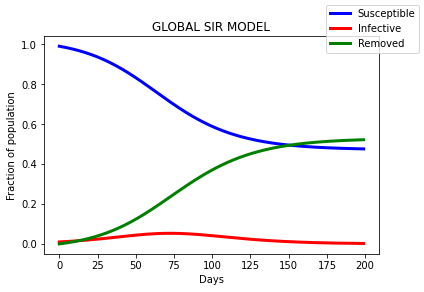

In [231]:
import matplotlib.pyplot as plt
import numpy as np

ndays = 200
dt = 1 #time step in days
beta = 0.14#infection rate
gamma = 0.1
S = np.zeros(ndays)#susceptible
I = np.zeros(ndays)#infected
R = np.zeros(ndays)#recovered
t =np.arange(ndays)*dt
r0 = beta/gamma
I[0] = 0.01 #initial infective proportion
S[0] = 1 - I[0] #initial susceptible
R[0] = 0.

for i in range (ndays-1):
  S[i+1] = S[i] - beta*(S[i]*I[i])*dt
  I[i+1] = I[i] + (beta*S[i]*I[i]-gamma*I[i])*dt
  R[i+1] = R[i] + (gamma*I[i])*dt

fig = plt.figure(1); fig.clf()
plt.plot(t,S,'b',lw=3, label='Susceptible')
plt.plot(t,I,'r',lw=3, label='Infective')
plt.plot(t,R,'g',lw=3, label='Removed')

fig.legend();plt.xlabel('Days'); plt.ylabel('Fraction of population');plt.title('GLOBAL SIR MODEL')

## **SIR FOR DEMOCRATS**

Text(0.5, 1.0, 'SIR MODEL FOR DEMOCRATS')

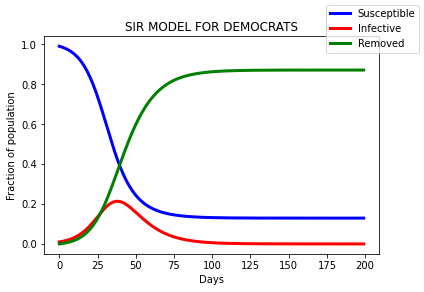

In [228]:
import matplotlib.pyplot as plt
import numpy as np

ndays = 200
dt = 1 #time step in days
beta = 0.23#infection rate
gamma = 0.1
S = np.zeros(ndays)#susceptible
I = np.zeros(ndays)#infected
R = np.zeros(ndays)#recovered
t =np.arange(ndays)*dt
r0 = beta/gamma
I[0] = 0.01 #initial infective proportion
S[0] = 1 - I[0] #initial susceptible
R[0] = 0.

for i in range (ndays-1):
  S[i+1] = S[i] - beta*(S[i]*I[i])*dt
  I[i+1] = I[i] + (beta*S[i]*I[i]-gamma*I[i])*dt
  R[i+1] = R[i] + (gamma*I[i])*dt

fig = plt.figure(1); fig.clf()
plt.plot(t,S,'b',lw=3, label='Susceptible')
plt.plot(t,I,'r',lw=3, label='Infective')
plt.plot(t,R,'g',lw=3, label='Removed')

fig.legend();plt.xlabel('Days'); plt.ylabel('Fraction of population');plt.title('SIR MODEL FOR DEMOCRATS')

## **SIR FOR NEUTRALS**

Text(0.5, 1.0, 'SIR MODEL FOR NEUTRAL POP')

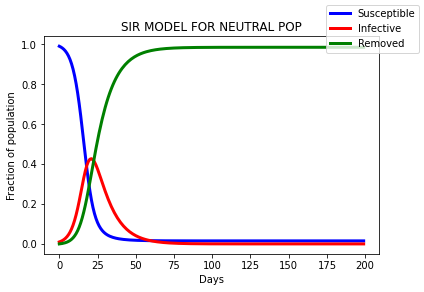

In [229]:
import matplotlib.pyplot as plt
import numpy as np

ndays = 200
dt = 1 #time step in days
beta = 0.40#infection rate
gamma = 0.1
S = np.zeros(ndays)#susceptible
I = np.zeros(ndays)#infected
R = np.zeros(ndays)#recovered
t =np.arange(ndays)*dt
r0 = beta/gamma
I[0] = 0.01 #initial infective proportion
S[0] = 1 - I[0] #initial susceptible
R[0] = 0.

for i in range (ndays-1):
  S[i+1] = S[i] - beta*(S[i]*I[i])*dt
  I[i+1] = I[i] + (beta*S[i]*I[i]-gamma*I[i])*dt
  R[i+1] = R[i] + (gamma*I[i])*dt

fig = plt.figure(1); fig.clf()
plt.plot(t,S,'b',lw=3, label='Susceptible')
plt.plot(t,I,'r',lw=3, label='Infective')
plt.plot(t,R,'g',lw=3, label='Removed')

fig.legend();plt.xlabel('Days'); plt.ylabel('Fraction of population');plt.title('SIR MODEL FOR NEUTRAL POP')

## **SIR FOR REPUBLICANS**

Text(0.5, 1.0, 'SIR MODEL FOR REPUBLICANS')

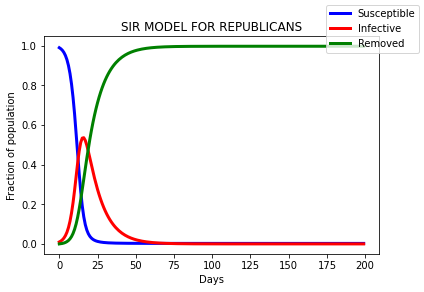

In [233]:
import matplotlib.pyplot as plt
import numpy as np

ndays = 200
dt = 1 #time step in days
beta = 0.54#infection rate
gamma = 0.1
S = np.zeros(ndays)#susceptible
I = np.zeros(ndays)#infected
R = np.zeros(ndays)#recovered
t =np.arange(ndays)*dt
r0 = beta/gamma
I[0] = 0.01 #initial infective proportion
S[0] = 1 - I[0] #initial susceptible
R[0] = 0.

for i in range (ndays-1):
  S[i+1] = S[i] - beta*(S[i]*I[i])*dt
  I[i+1] = I[i] + (beta*S[i]*I[i]-gamma*I[i])*dt
  R[i+1] = R[i] + (gamma*I[i])*dt

fig = plt.figure(1); fig.clf()
plt.plot(t,S,'b',lw=3, label='Susceptible')
plt.plot(t,I,'r',lw=3, label='Infective')
plt.plot(t,R,'g',lw=3, label='Removed')

fig.legend();plt.xlabel('Days'); plt.ylabel('Fraction of population');plt.title('SIR MODEL FOR REPUBLICANS')